---
author: "Robert Ritz"
draft: true
echo: false
---

# How much of my life do I waste waiting for websites to load?

Just how much time do we spend throughout our lives waiting for websites to load? You might think this number has gone down over the past 10 years. After all, our internet is faster, so that must mean the website loads faster, right?

To do this analysis, we will use these data to look at the problem:

- Website page load data from httparchive.org. The onLoad table is used as it goes back the furthest. The file contains onLoad times from November 2010 to August 2022. Stored at data/onload_httparchive.csv.

- Also, from httparchive.org (same page), I used the WebPage Speed Index data which is available from 2016-2022. Stored at data/webpage_speed_index_httparchive.csv.

- Bandwidth per user (in kbps) for 2012-2016 from the World Bank. The original data source is a WEF report. Stored at data/bandwidth_per_user.csv.

- Average download speeds from Speedtest.com. July 2022 showed a median download of 67.25 Mbps for fixed broadband.

- According to Trading Economics, US internet speed in 2017 was 149 Mbps. Back in 2011, it was around 30 Mbps. Wayback Machine link.

- Countries and their regions according to ISO-3166 from Github - ISO-3166-Countries-with-Regional-Codes. Stored at data/iso3166.csv.

Using this data, we will make charts and then a simple tool to calculate how much time we waste waiting for websites to load.

> I also made a Streamlit app that allows you to estimate the time you have wasted waiting for web pages to load. You can see the code stored at streamlit_app.py.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

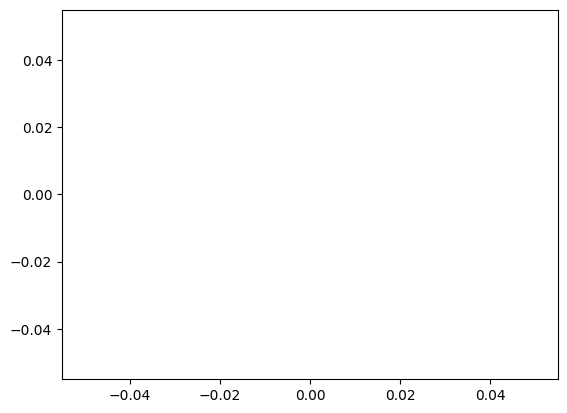

In [ ]:
plt.plot();

In [ ]:
plt.style.use("datafantic-right.mplstyle")

In [ ]:
onload = pd.read_csv('data/onload_httparchive.csv')
webpage_speed = pd.read_csv('data/webpage_speed_index_httparchive.csv')
bandwidth = pd.read_csv('data/bandwidth_per_user.csv')
countries = pd.read_csv('data/iso3166.csv')

In [ ]:
onload.head()

,date,client,p10,p25,p50,p75,p90
0,"Aug 1, 2022",desktop,2.4,3.9,6.5,11.2,19.8
1,"Jul 1, 2022",desktop,2.5,4.0,6.6,11.2,19.7
2,"Jun 1, 2022",desktop,2.5,3.9,6.5,11.1,19.7
3,"May 1, 2022",desktop,2.4,3.9,6.4,11.0,19.9
4,"Apr 1, 2022",desktop,2.4,3.9,6.3,10.8,19.0


In [ ]:
bandwidth.head()

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
0,AGO,Angola,3405,"Int'l Internet bandwidth, kb/s per user",kb/s,0.628868,NaN,0.56715,3.372527,NaN
1,ALB,Albania,3405,"Int'l Internet bandwidth, kb/s per user",kb/s,11.789772,19.037537,17.35800,20.973860,32.077379
2,ARE,United Arab Emirates,3405,"Int'l Internet bandwidth, kb/s per user",kb/s,17.937853,27.608572,32.44500,52.325382,79.641295
3,ARG,Argentina,3405,"Int'l Internet bandwidth, kb/s per user",kb/s,27.494328,25.711797,21.98300,44.307849,48.065152
4,ARM,Armenia,3405,"Int'l Internet bandwidth, kb/s per user",kb/s,7.752230,22.195891,40.37300,55.146390,44.534281


In [ ]:
webpage_speed.head()

,date,client,p10,p25,p50,p75,p90
0,"Aug 1, 2022",desktop,1.6,2.5,4.0,6.6,10.7
1,"Aug 1, 2022",mobile,3.0,4.2,6.1,9.4,14.2
2,"Jul 1, 2022",desktop,1.6,2.5,4.0,6.6,10.6
3,"Jul 1, 2022",mobile,3.0,4.2,6.1,9.3,14.1
4,"Jun 9, 2022",desktop,1.6,2.3,3.5,5.6,9.0


### OnLoad speeds

Seeing how fast pages load absolutely shocked me. The speed has literally not changed in 10 years. Let's visualize it. 

In [ ]:
onload['date'] = pd.to_datetime(onload['date'])
onload = onload.sort_values(by='date').reset_index(drop=True)

In [ ]:
ax.get_xlim()

(14714.15, 19418.85)

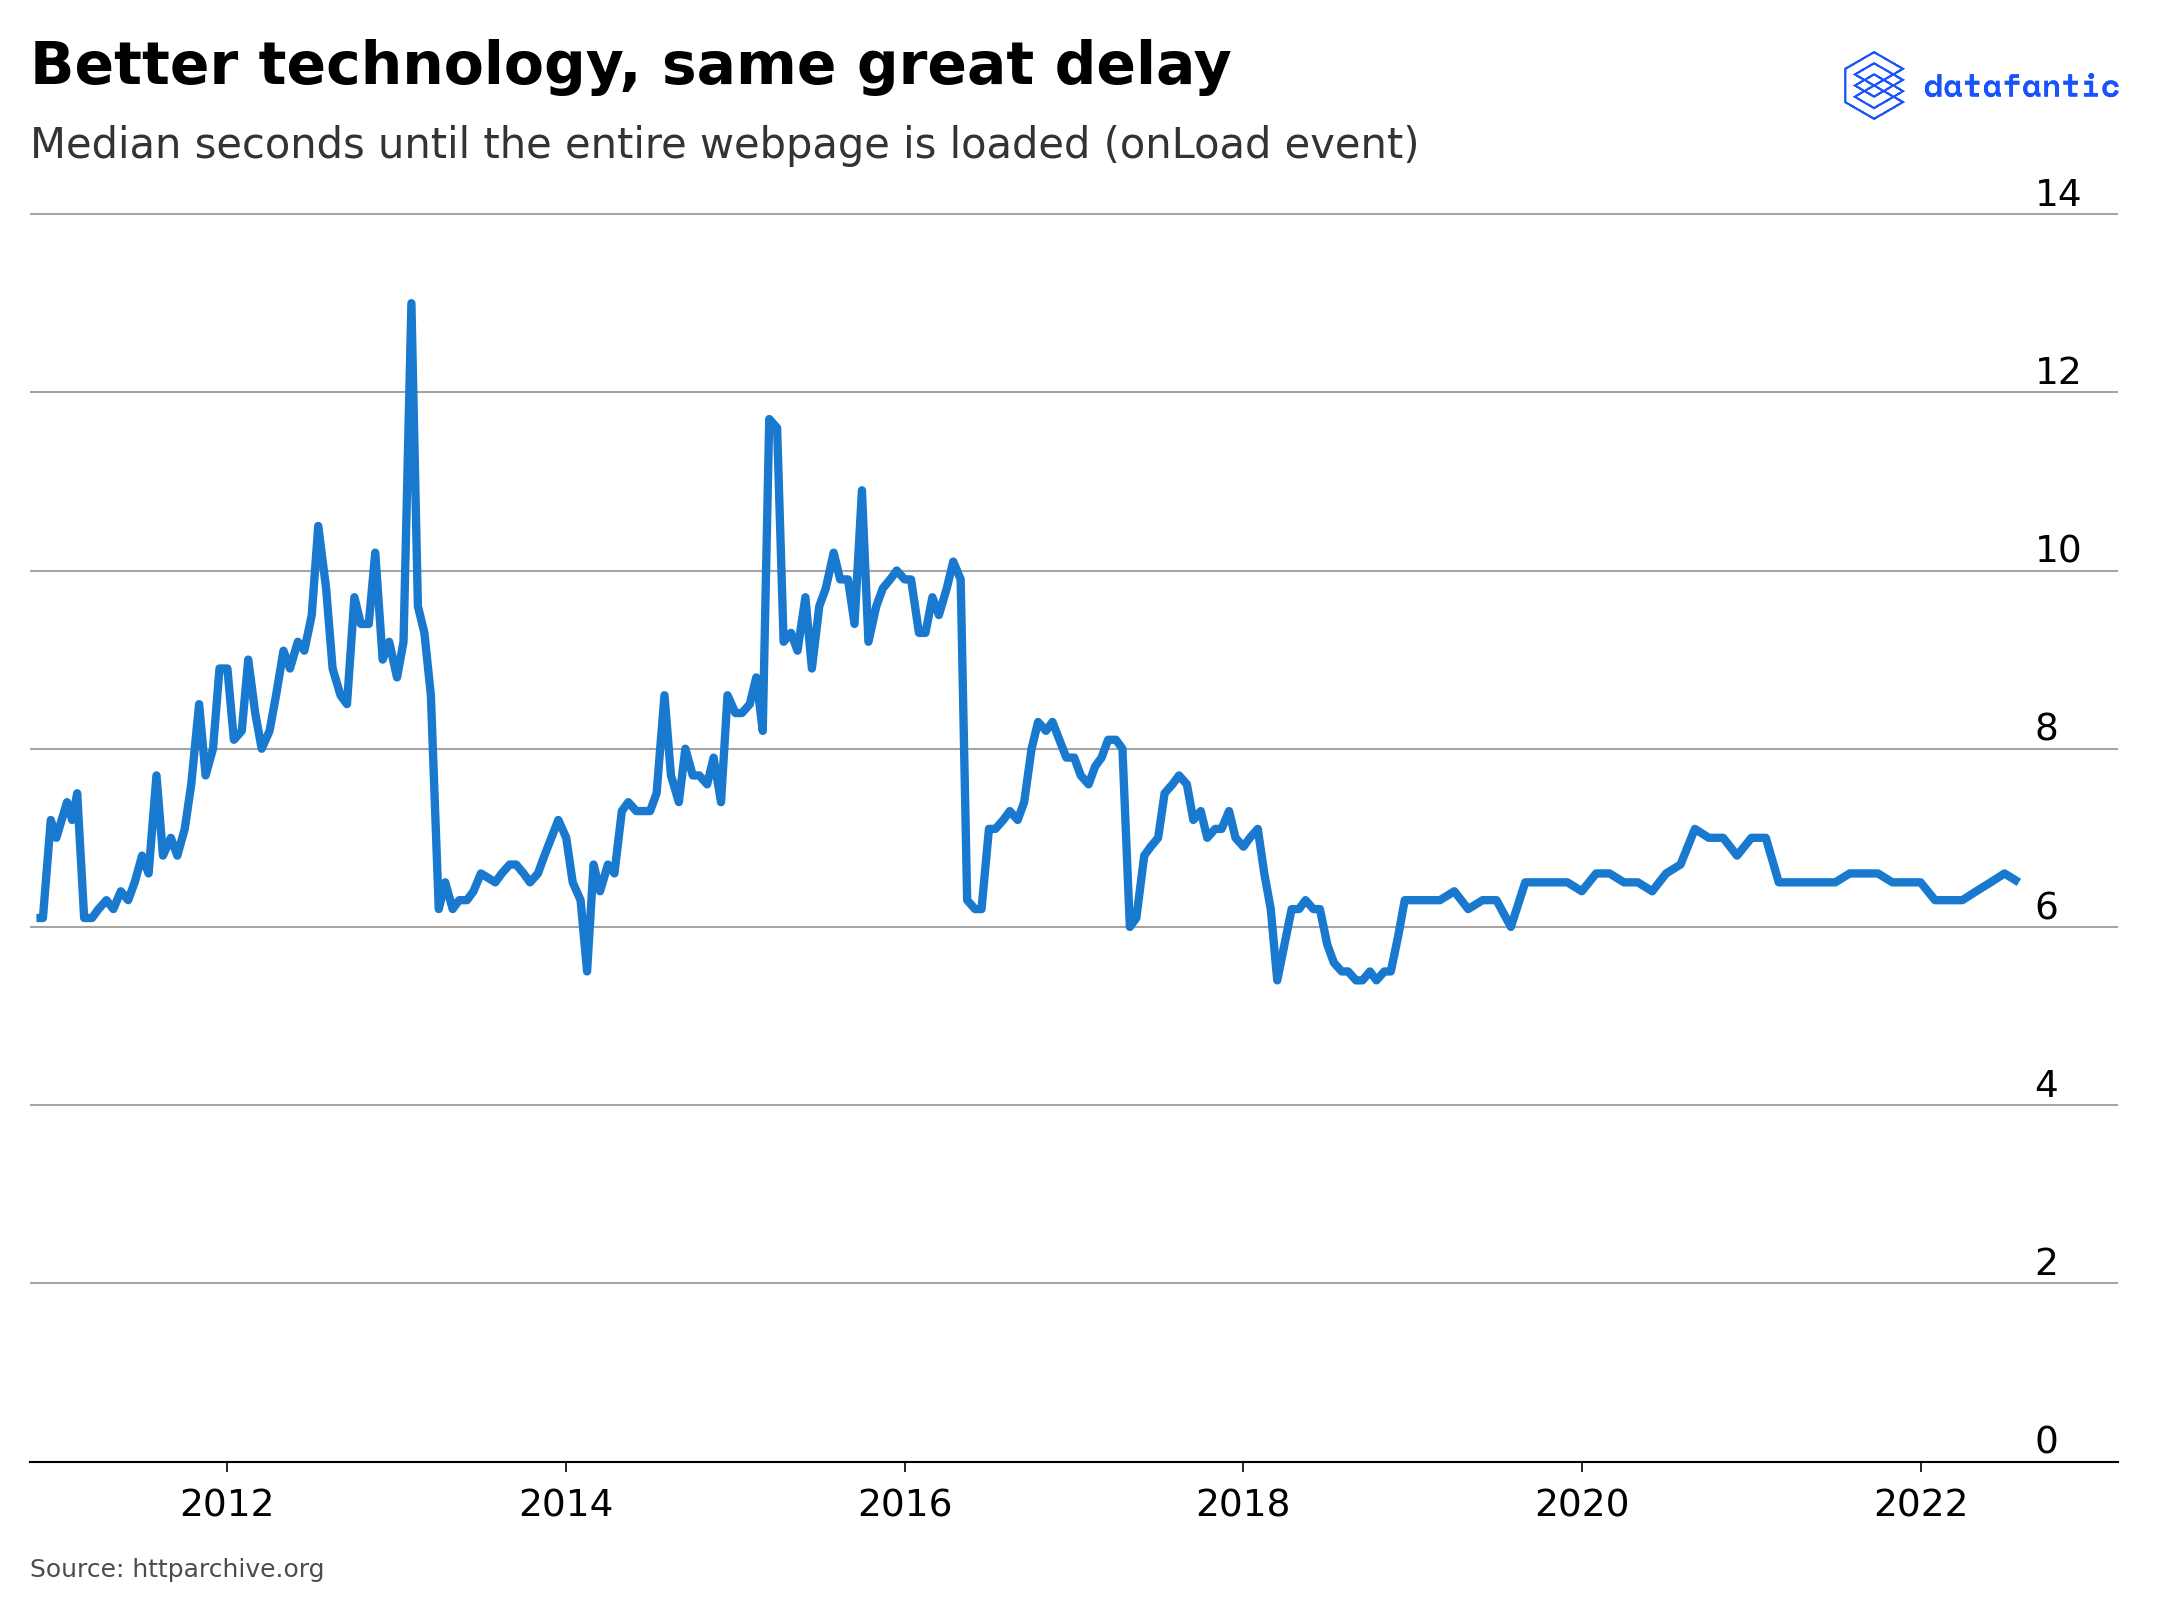

In [ ]:
fig, ax = plt.subplots()
ax.plot(onload['date'], onload['p50'])

# Add in title and subtitle
ax.set_title("""Better technology, same great delay""")
ax.text(x=.08, y=.86, 
        s="Median seconds until the entire webpage is loaded (onLoad event)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

ax.set_xlim(14914.15, 19418.85)
ax.set_ylim(0, 15)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)

# Set source text
ax.text(x=0.08, y=0.0, 
        s="""Source: httparchive.org""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=12, 
        alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/onload.png')

### WebPage Speed Index

In [ ]:
webpage_speed['date'] = pd.to_datetime(webpage_speed['date'])
webpage_speed = webpage_speed.sort_values(by='date').reset_index(drop=True)
webpage_speed.head()

,date,client,p10,p25,p50,p75,p90
0,2016-01-01,mobile,3.7,5.2,7.6,11.0,15.1
1,2016-01-01,desktop,1.6,2.6,3.9,5.9,8.8
2,2016-01-15,desktop,1.6,2.6,3.9,5.9,8.8
3,2016-01-15,mobile,3.7,5.2,7.6,11.2,15.8
4,2016-02-01,desktop,1.6,2.5,3.9,5.8,8.6


The WebPage speed index is also available on httparchive.org and is a available from 2016-2022. 

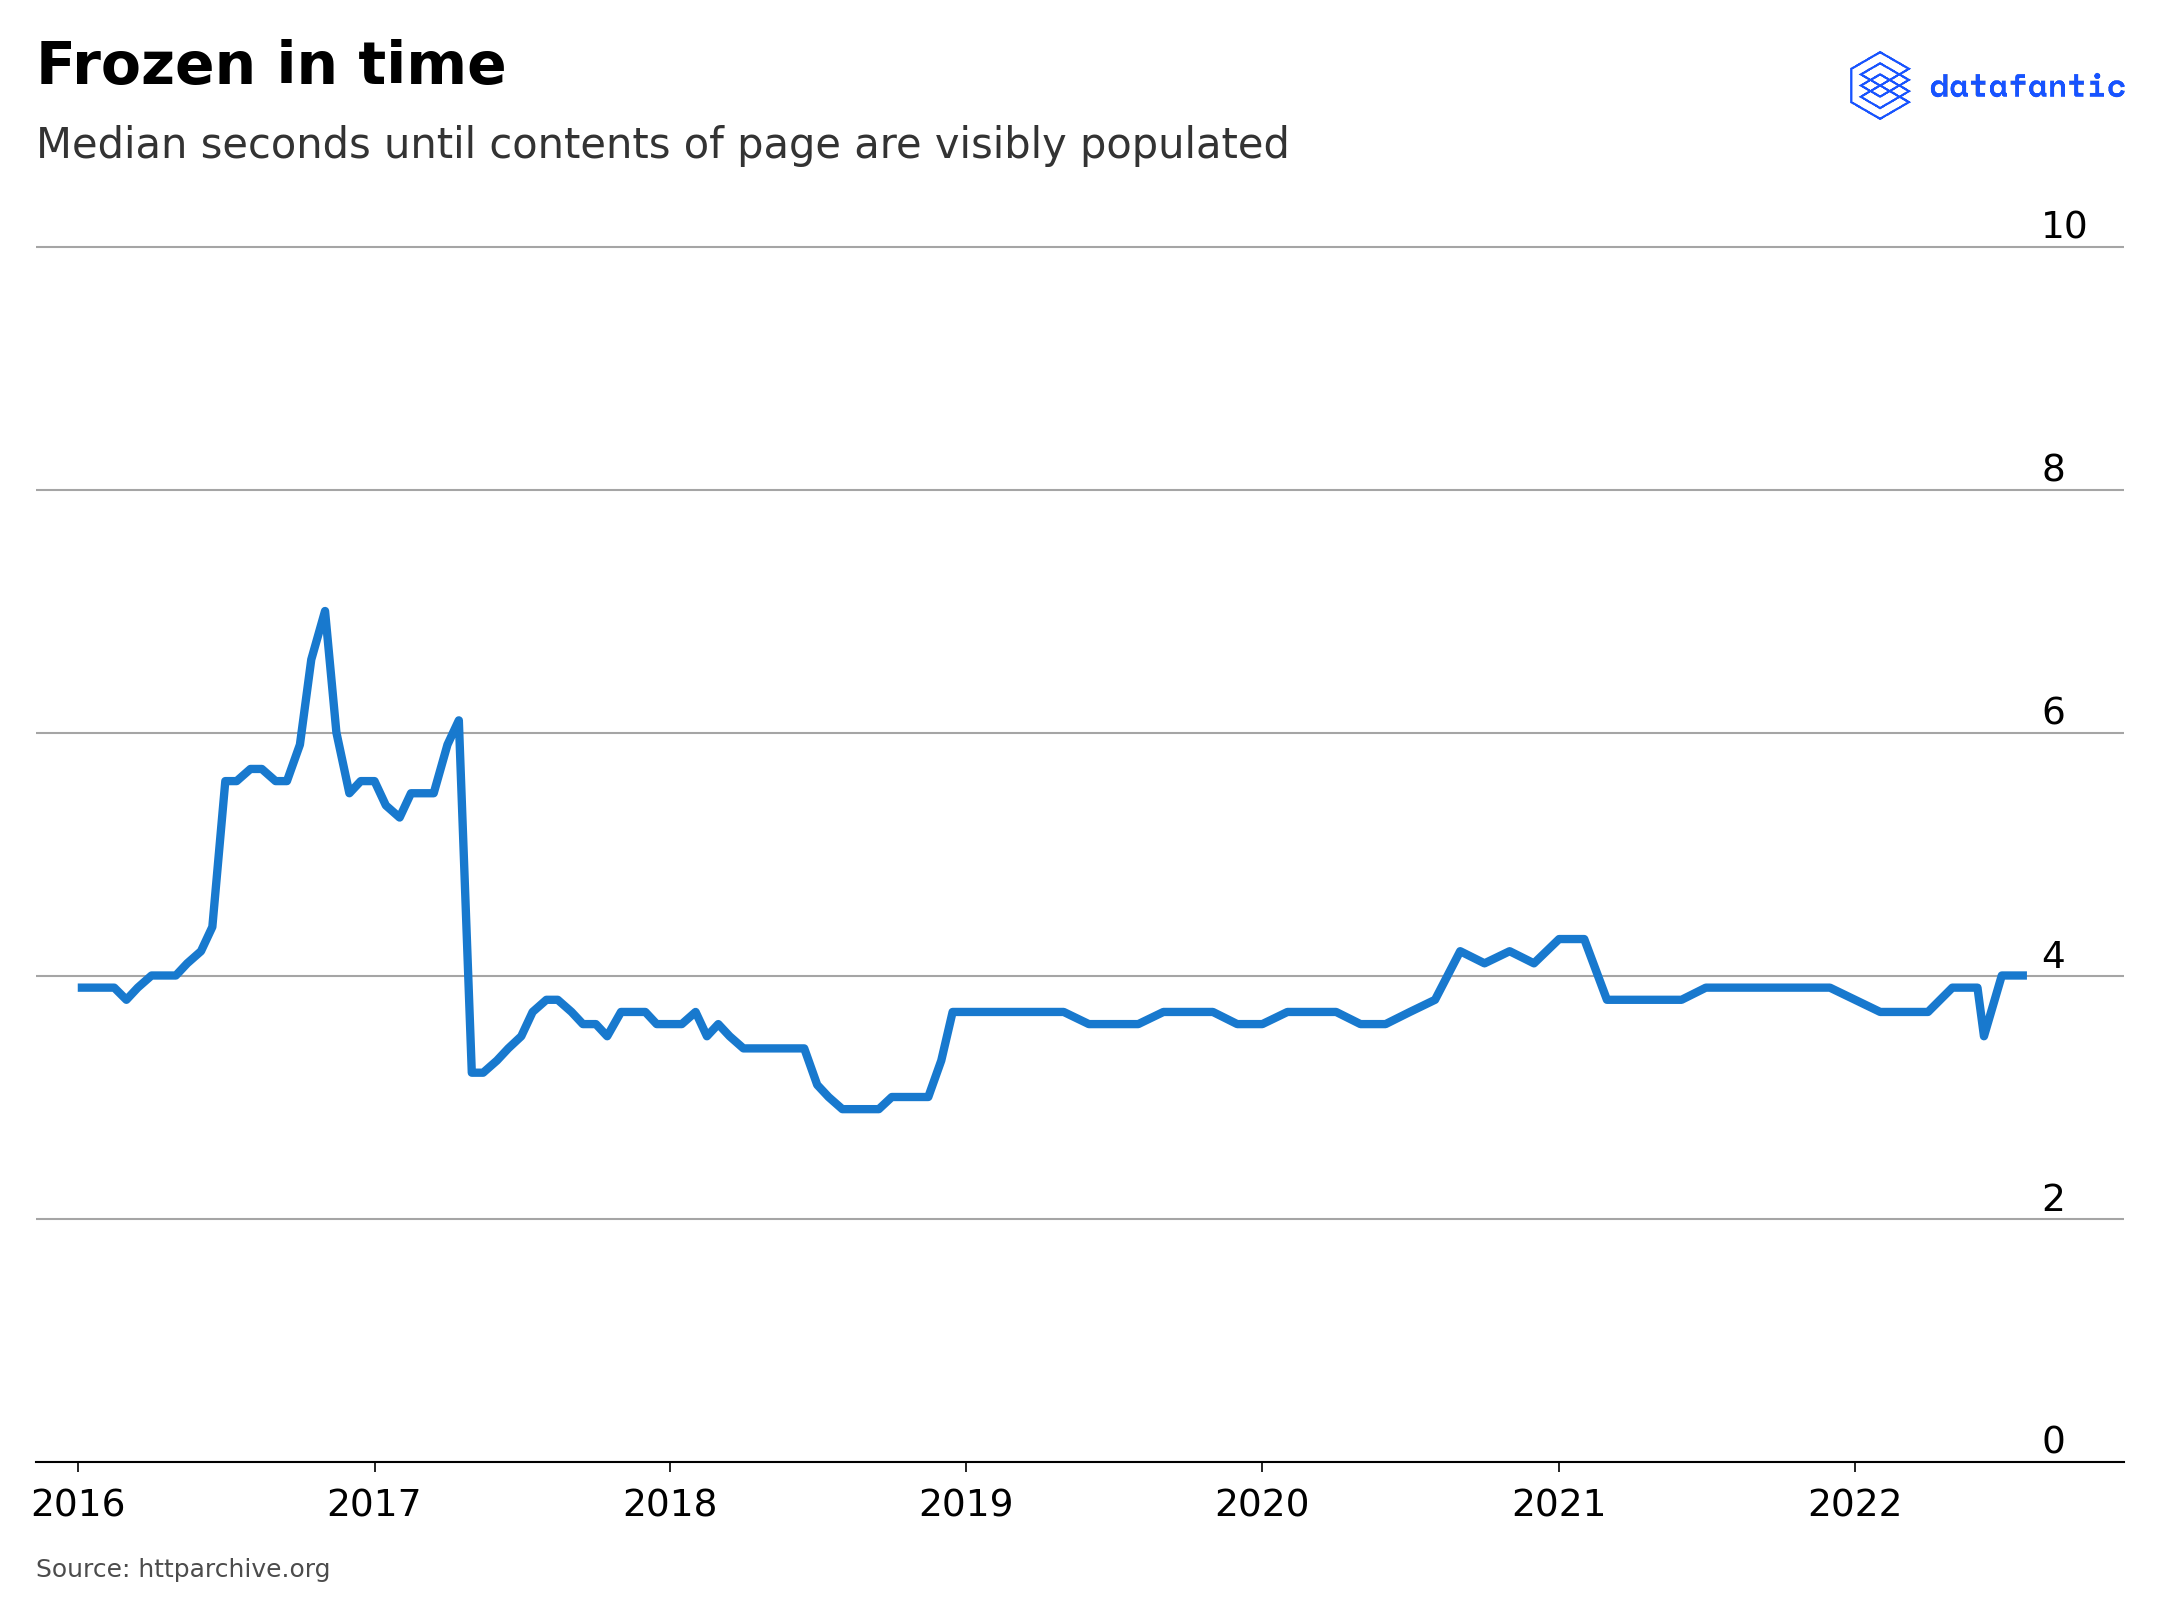

In [ ]:
fig, ax = plt.subplots()
ax.plot(webpage_speed[webpage_speed['client'] == 'desktop']['date'], 
        webpage_speed[webpage_speed['client'] == 'desktop']['p50'])

# Add in title and subtitle
ax.set_title("""Frozen in time""")
ax.text(x=.08, y=.86, 
        s="Median seconds until contents of page are visibly populated", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

ax.set_xlim(16750, 19325.2)
ax.set_ylim(0, 11)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)

# Set source text
ax.text(x=0.08, y=0.0, 
        s="""Source: httparchive.org""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=12, 
        alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/speed_index.png')

## What didn't work

### Internet download speed over time

Internet bandwidth per user has been exploding over time. So much so that it seems most international organizations don't even track it anymore. World Bank data stops in 2016. Let's use this data to visulalize the trend. 

In [ ]:
countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [ ]:
bandwidth = (bandwidth.melt(id_vars=['Country ISO3','Country Name','Indicator Id', 'Indicator','Subindicator Type'], 
                            value_vars=['2012','2013','2014','2015','2016'], 
                            var_name='year',
                            value_name='kbps')
                      .drop(columns=['Indicator Id', 'Indicator', 'Subindicator Type'])
                      .merge(countries[['alpha-3','region']], how='left', left_on='Country ISO3', right_on='alpha-3')
                      .drop(columns=['Country ISO3', 'alpha-3']))
bandwidth.head()

,Country Name,year,kbps,region
0,Angola,2012,0.628868,Africa
1,Albania,2012,11.789772,Europe
2,United Arab Emirates,2012,17.937853,Asia
3,Argentina,2012,27.494328,Americas
4,Armenia,2012,7.752230,Asia


In [ ]:
bandwidth['Country Name'].unique()

array(['Angola', 'Albania', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi',
       'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Bosnia and Herzegovina', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Colombia', 'Cabo Verde', 'Costa Rica', 'Cyprus', 'Czech Republic',
       'Germany', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia, The', 'Greece', 'Guatemala', 'Guyana',
       'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iran, Islamic Rep.', 'Iceland',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
       'Kenya', 'Ky

Text(0.08, 0.0, 'Source: World Bank')

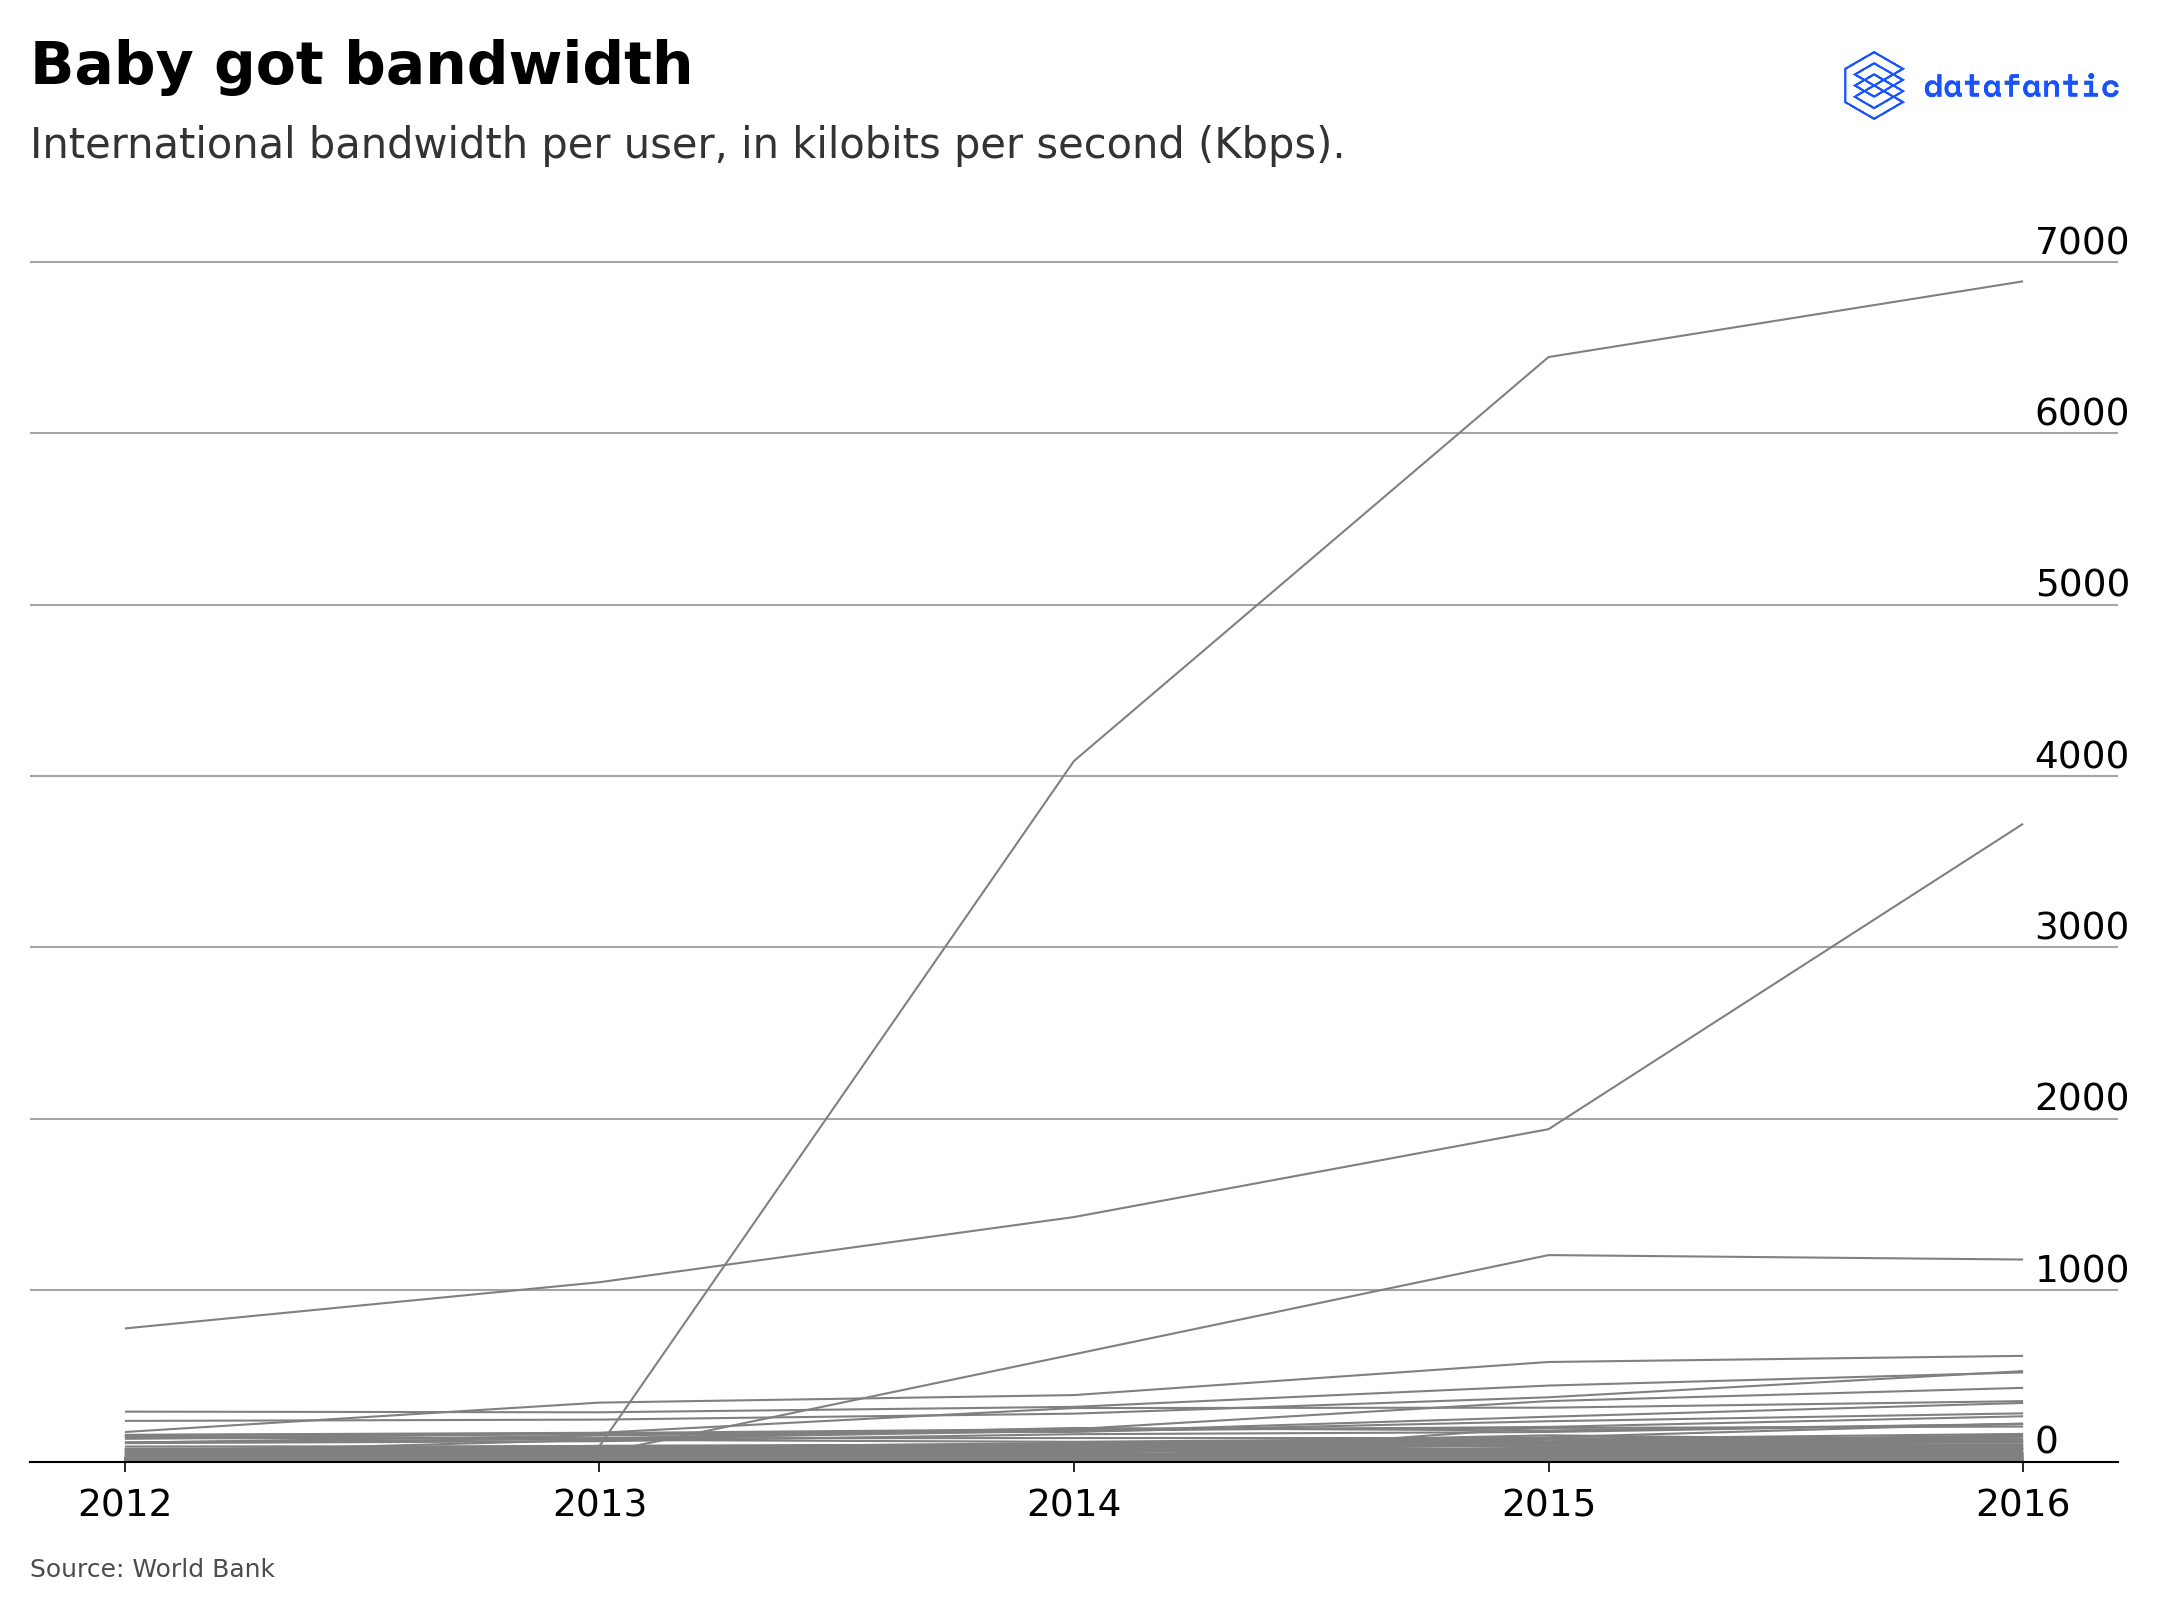

In [ ]:
fig, ax = plt.subplots()

for country in bandwidth['Country Name'].unique():
    country_df = bandwidth[bandwidth['Country Name'] == country]
    ax.plot(country_df['year'], country_df['kbps'], linewidth=1, color='grey')

ax.set_ylim(0, 7800)

# Add in title and subtitle
ax.set_title("""Baby got bandwidth""")
ax.text(x=.08, y=.86, 
        s="International bandwidth per user, in kilobits per second (Kbps).", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)

# Set source text
ax.text(x=0.08, y=0.0, 
        s="""Source: World Bank""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=12, 
        alpha=.7)

Plotting by country is too busy and doesn't tell a great story. Let's try to group by median per year.

In [ ]:
median_bandwidth = bandwidth.groupby(by=['year','region']).median().reset_index()

In [ ]:
median_bandwidth

,year,region,kbps
0,2012,Africa,1.790842
1,2012,Americas,10.219076
2,2012,Asia,9.552923
3,2012,Europe,62.794172
4,2012,Oceania,30.334425
5,2013,Africa,3.406623
6,2013,Americas,16.795686
7,2013,Asia,14.124250
8,2013,Europe,72.678938
9,2013,Oceania,37.051137


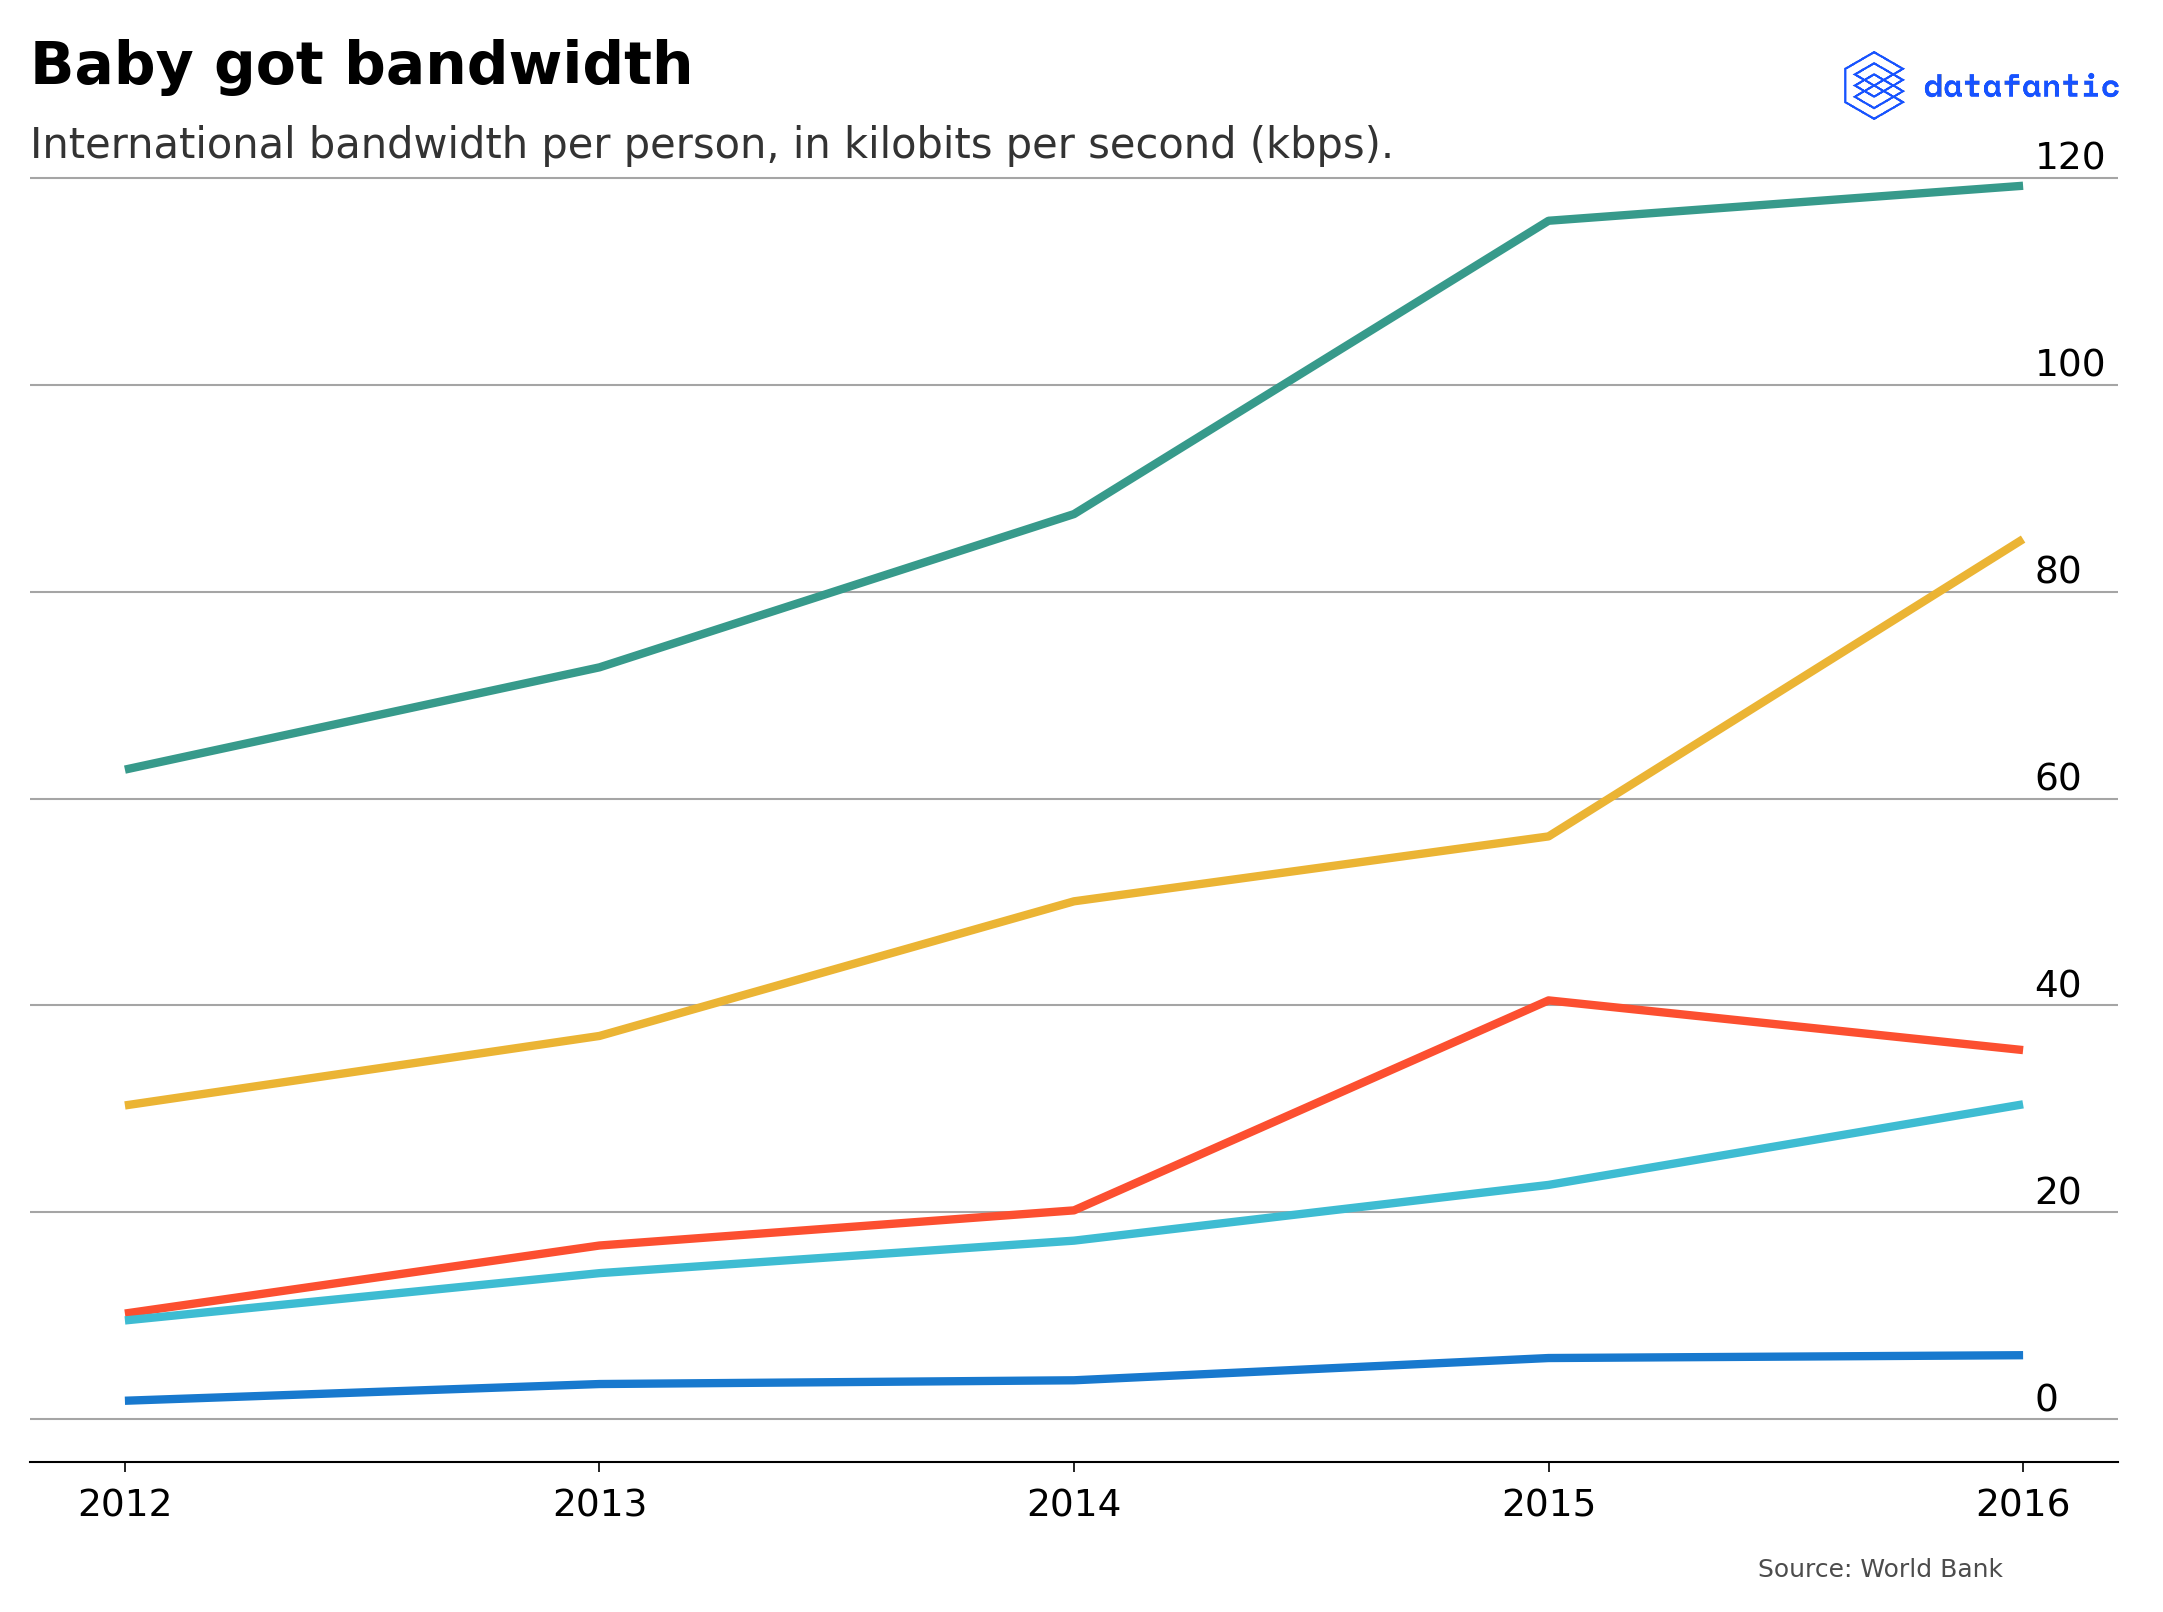

In [ ]:
fig, ax = plt.subplots()

for region in median_bandwidth['region'].unique():
    region_df = median_bandwidth[median_bandwidth['region'] == region]
    ax.plot(region_df['year'], region_df['kbps'])

# Add in title and subtitle
ax.set_title("""Baby got bandwidth""")
ax.text(x=.08, y=.86, 
        s="International bandwidth per person, in kilobits per second (kbps).", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

#ax.set_xlim(2012, 2016)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)

# Set source text
ax.text(x=0.8, y=0.0, 
        s="""Source: World Bank""", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=12, 
        alpha=.7)

This still doesn't tell a great story. I'm going to scrap this as the data just isn't useful. 

- [x] Make chart - internet speeds

- [x] Make chart - page loading speed

- [x] Make time wasted per 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e215df48-947e-43c2-ae0d-f8648c2bd5d2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>